In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler

In [211]:
Olx_df=pd.read_csv('wc_olx_data1.csv')

In [212]:
Olx_df

,Unnamed: 0,Variant,Make_Month,No_of_Owners,Color,Type_of_Car,Transmission,Insurance_Type,Condition,Registration_Place,...,Registration_Transfer,Insurance,Finance,Exchange,Brand,Model,Year,Fuel,KM_driven,Price
0,0,CitySV,March,First,Grey,Sedans,Manual,Comprehensive,Used,MH,...,Yes,Yes,Yes,Yes,Honda,City,2017.0,Petrol,"45,000 km",775000
1,1,VXCVTi-vtec,July,First,Brown,Sedans,Automatic,Comprehensive,Used,MH,...,Yes,Yes,Yes,Yes,Honda,City,2018.0,Petrol,"15,000 km",1220000
2,2,City1.5VManual,June,First,Brown,Sedans,Manual,Comprehensive,Used,MH,...,Yes,Yes,Yes,Yes,Honda,City,2014.0,Petrol,"55,000 km",565000
3,3,SwiftVDi,June,First,Other,Hatchback,Manual,NoInsurance,Used,MH,...,Yes,Yes,NaN,Yes,Maruti Suzuki,Swift,2008.0,Diesel,"110,000 km",225000
4,4,SwiftDzireVXi1.2BS-IV,March,First,Silver,Sedans,Manual,Comprehensive,Used,MH,...,Yes,Yes,Yes,Yes,Maruti Suzuki,Swift Dzire,2010.0,Petrol,"56,951 km",265000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,803,NaN,November,NaN,Silver,NaN,NaN,NoInsurance,NaN,GJ,...,NaN,NaN,NaN,NaN,Maruti Suzuki,Wagon R 1.0,2011.0,Petrol,"98,275 km",240000
804,804,SwiftLXi,May,First,Silver,Hatchback,Manual,ThirdParty,Used,WB,...,NaN,NaN,NaN,NaN,Maruti Suzuki,Swift,2013.0,Petrol,"40,000 km",249666
805,805,WagonR1.0LXiCNG,August,First,Grey,Hatchback,Manual,NoInsurance,Used,MH,...,Yes,Yes,NaN,NaN,Maruti Suzuki,Wagon R 1.0,2010.0,CNG & Hybrids,"67,000 km",215000
806,806,AltoK10VXi,November,First,Silver,Sedans,Manual,ThirdParty,Used,MH,...,Yes,Yes,Yes,Yes,Maruti Suzuki,Alto K10,2012.0,Petrol,"42,000 km",197000


In [213]:
Olx_df.isnull().sum()

Unnamed: 0                      0
Variant                        33
Make_Month                     60
No_of_Owners                   33
Color                          50
Type_of_Car                    60
Transmission                   31
Insurance_Type                 47
Condition                      60
Registration_Place             36
Power_steering                295
Cruise_Control                782
Navigation_System             707
Adjustable_Steering           519
Automatic_Boot                661
Air_Conditioning              442
Power_Windows                 422
Sunroof                       797
Fog_Lamps                     437
Alloy_Wheels                  688
Adjustable_External_Mirror    510
Display_Screen                588
Bluetooth                     588
AMFM_adio                     808
USB_Compatibility             460
Aux_Compatibility             457
ABS                           633
Anti_Theft_Device             655
Rear_Parking_Camera           649
Parking_Sensor

In [214]:
new_df=Olx_df[['Make_Month', 'No_of_Owners', 'Color',
       'Type_of_Car', 'Transmission', 'Insurance_Type', 'Condition',
       'Registration_Place', 'Brand',
       'Model', 'Year', 'Fuel', 'KM_driven', 'Price']]

In [215]:
new_df

,Make_Month,No_of_Owners,Color,Type_of_Car,Transmission,Insurance_Type,Condition,Registration_Place,Brand,Model,Year,Fuel,KM_driven,Price
0,March,First,Grey,Sedans,Manual,Comprehensive,Used,MH,Honda,City,2017.0,Petrol,"45,000 km",775000
1,July,First,Brown,Sedans,Automatic,Comprehensive,Used,MH,Honda,City,2018.0,Petrol,"15,000 km",1220000
2,June,First,Brown,Sedans,Manual,Comprehensive,Used,MH,Honda,City,2014.0,Petrol,"55,000 km",565000
3,June,First,Other,Hatchback,Manual,NoInsurance,Used,MH,Maruti Suzuki,Swift,2008.0,Diesel,"110,000 km",225000
4,March,First,Silver,Sedans,Manual,Comprehensive,Used,MH,Maruti Suzuki,Swift Dzire,2010.0,Petrol,"56,951 km",265000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,November,NaN,Silver,NaN,NaN,NoInsurance,NaN,GJ,Maruti Suzuki,Wagon R 1.0,2011.0,Petrol,"98,275 km",240000
804,May,First,Silver,Hatchback,Manual,ThirdParty,Used,WB,Maruti Suzuki,Swift,2013.0,Petrol,"40,000 km",249666
805,August,First,Grey,Hatchback,Manual,NoInsurance,Used,MH,Maruti Suzuki,Wagon R 1.0,2010.0,CNG & Hybrids,"67,000 km",215000
806,November,First,Silver,Sedans,Manual,ThirdParty,Used,MH,Maruti Suzuki,Alto K10,2012.0,Petrol,"42,000 km",197000


## Filter Only Maruti Suzuki Brand 

In [216]:
Maruti_df=new_df[new_df['Brand']=='Maruti Suzuki']

In [217]:
Maruti_df

,Make_Month,No_of_Owners,Color,Type_of_Car,Transmission,Insurance_Type,Condition,Registration_Place,Brand,Model,Year,Fuel,KM_driven,Price
3,June,First,Other,Hatchback,Manual,NoInsurance,Used,MH,Maruti Suzuki,Swift,2008.0,Diesel,"110,000 km",225000
4,March,First,Silver,Sedans,Manual,Comprehensive,Used,MH,Maruti Suzuki,Swift Dzire,2010.0,Petrol,"56,951 km",265000
5,February,First,White,Sedans,Manual,Comprehensive,Used,MH,Maruti Suzuki,Swift,2012.0,Diesel,"55,000 km",385000
6,July,First,Blue,Hatchback,Manual,Comprehensive,Used,MH,Maruti Suzuki,Swift,2012.0,Petrol,"18,000 km",370000
7,March,First,Grey,Sedans,Manual,Comprehensive,Used,MH,Maruti Suzuki,Swift Dzire,2013.0,CNG & Hybrids,"97,000 km",390000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,November,NaN,Silver,NaN,NaN,NoInsurance,NaN,GJ,Maruti Suzuki,Wagon R 1.0,2011.0,Petrol,"98,275 km",240000
804,May,First,Silver,Hatchback,Manual,ThirdParty,Used,WB,Maruti Suzuki,Swift,2013.0,Petrol,"40,000 km",249666
805,August,First,Grey,Hatchback,Manual,NoInsurance,Used,MH,Maruti Suzuki,Wagon R 1.0,2010.0,CNG & Hybrids,"67,000 km",215000
806,November,First,Silver,Sedans,Manual,ThirdParty,Used,MH,Maruti Suzuki,Alto K10,2012.0,Petrol,"42,000 km",197000


In [218]:
cols=Maruti_df.Model.unique() 
cols

array(['Swift', 'Swift Dzire', 'Wagon R', 'Wagon R 1.0', 'Ertiga', 'Ritz',
       'Celerio', 'Ignis', '800', 'Omni', 'Ciaz', 'Baleno',
       'Vitara Brezza', 'Alto', 'Zen', 'Alto K10'], dtype=object)

In [219]:
for i in range(len(cols)):
    MarutiS_df=Maruti_df[Maruti_df['Model']==cols[i]]
    total_rows=len(MarutiS_df.axes[0])
    print("Number of Rows: ",cols[i]  ,   '  \t\t '+str(total_rows))

Number of Rows:  Swift   		 220
Number of Rows:  Swift Dzire   		 132
Number of Rows:  Wagon R   		 93
Number of Rows:  Wagon R 1.0   		 131
Number of Rows:  Ertiga   		 162
Number of Rows:  Ritz   		 2
Number of Rows:  Celerio   		 2
Number of Rows:  Ignis   		 1
Number of Rows:  800   		 6
Number of Rows:  Omni   		 6
Number of Rows:  Ciaz   		 2
Number of Rows:  Baleno   		 1
Number of Rows:  Vitara Brezza   		 1
Number of Rows:  Alto   		 4
Number of Rows:  Zen   		 2
Number of Rows:  Alto K10   		 1


## We Can see number of row >100 is five type of Maruti Suzuki car model['Swift', 'Swift Dzire', 'Wagon R', 'Wagon R 1.0', 'Ertiga'] So we use five model of this 

In [220]:
MarutiS_df=Maruti_df.set_index(['Model'])

In [221]:
MarutiS_df

,Make_Month,No_of_Owners,Color,Type_of_Car,Transmission,Insurance_Type,Condition,Registration_Place,Brand,Year,Fuel,KM_driven,Price
Model,,,,,,,,,,,,,
Swift,June,First,Other,Hatchback,Manual,NoInsurance,Used,MH,Maruti Suzuki,2008.0,Diesel,"110,000 km",225000
Swift Dzire,March,First,Silver,Sedans,Manual,Comprehensive,Used,MH,Maruti Suzuki,2010.0,Petrol,"56,951 km",265000
Swift,February,First,White,Sedans,Manual,Comprehensive,Used,MH,Maruti Suzuki,2012.0,Diesel,"55,000 km",385000
Swift,July,First,Blue,Hatchback,Manual,Comprehensive,Used,MH,Maruti Suzuki,2012.0,Petrol,"18,000 km",370000
Swift Dzire,March,First,Grey,Sedans,Manual,Comprehensive,Used,MH,Maruti Suzuki,2013.0,CNG & Hybrids,"97,000 km",390000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wagon R 1.0,November,NaN,Silver,NaN,NaN,NoInsurance,NaN,GJ,Maruti Suzuki,2011.0,Petrol,"98,275 km",240000
Swift,May,First,Silver,Hatchback,Manual,ThirdParty,Used,WB,Maruti Suzuki,2013.0,Petrol,"40,000 km",249666
Wagon R 1.0,August,First,Grey,Hatchback,Manual,NoInsurance,Used,MH,Maruti Suzuki,2010.0,CNG & Hybrids,"67,000 km",215000


In [222]:
New_MarutiS_df=MarutiS_df.drop(['Ritz','Celerio', 'Ignis', '800', 'Omni', 'Ciaz', 'Baleno',
       'Vitara Brezza', 'Alto', 'Zen', 'Alto K10'],axis=0)

In [223]:
New_MarutiS_df

,Make_Month,No_of_Owners,Color,Type_of_Car,Transmission,Insurance_Type,Condition,Registration_Place,Brand,Year,Fuel,KM_driven,Price
Model,,,,,,,,,,,,,
Swift,June,First,Other,Hatchback,Manual,NoInsurance,Used,MH,Maruti Suzuki,2008.0,Diesel,"110,000 km",225000
Swift Dzire,March,First,Silver,Sedans,Manual,Comprehensive,Used,MH,Maruti Suzuki,2010.0,Petrol,"56,951 km",265000
Swift,February,First,White,Sedans,Manual,Comprehensive,Used,MH,Maruti Suzuki,2012.0,Diesel,"55,000 km",385000
Swift,July,First,Blue,Hatchback,Manual,Comprehensive,Used,MH,Maruti Suzuki,2012.0,Petrol,"18,000 km",370000
Swift Dzire,March,First,Grey,Sedans,Manual,Comprehensive,Used,MH,Maruti Suzuki,2013.0,CNG & Hybrids,"97,000 km",390000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wagon R,June,Second,Silver,Hatchback,Manual,Comprehensive,Used,TN,Maruti Suzuki,2005.0,Petrol,"78,000 km",175000
Wagon R,June,First,White,Hatchback,Manual,NaN,NaN,KA,Maruti Suzuki,2011.0,Petrol,"77,100 km",295000
Wagon R 1.0,November,NaN,Silver,NaN,NaN,NoInsurance,NaN,GJ,Maruti Suzuki,2011.0,Petrol,"98,275 km",240000


In [224]:
New_MarutiS_df.reset_index(inplace=True)

In [225]:
New_MarutiS_df

,Model,Make_Month,No_of_Owners,Color,Type_of_Car,Transmission,Insurance_Type,Condition,Registration_Place,Brand,Year,Fuel,KM_driven,Price
0,Swift,June,First,Other,Hatchback,Manual,NoInsurance,Used,MH,Maruti Suzuki,2008.0,Diesel,"110,000 km",225000
1,Swift Dzire,March,First,Silver,Sedans,Manual,Comprehensive,Used,MH,Maruti Suzuki,2010.0,Petrol,"56,951 km",265000
2,Swift,February,First,White,Sedans,Manual,Comprehensive,Used,MH,Maruti Suzuki,2012.0,Diesel,"55,000 km",385000
3,Swift,July,First,Blue,Hatchback,Manual,Comprehensive,Used,MH,Maruti Suzuki,2012.0,Petrol,"18,000 km",370000
4,Swift Dzire,March,First,Grey,Sedans,Manual,Comprehensive,Used,MH,Maruti Suzuki,2013.0,CNG & Hybrids,"97,000 km",390000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,Wagon R,June,Second,Silver,Hatchback,Manual,Comprehensive,Used,TN,Maruti Suzuki,2005.0,Petrol,"78,000 km",175000
734,Wagon R,June,First,White,Hatchback,Manual,NaN,NaN,KA,Maruti Suzuki,2011.0,Petrol,"77,100 km",295000
735,Wagon R 1.0,November,NaN,Silver,NaN,NaN,NoInsurance,NaN,GJ,Maruti Suzuki,2011.0,Petrol,"98,275 km",240000
736,Swift,May,First,Silver,Hatchback,Manual,ThirdParty,Used,WB,Maruti Suzuki,2013.0,Petrol,"40,000 km",249666


In [226]:
New_MarutiS_df.dtypes

Model                  object
Make_Month             object
No_of_Owners           object
Color                  object
Type_of_Car            object
Transmission           object
Insurance_Type         object
Condition              object
Registration_Place     object
Brand                  object
Year                  float64
Fuel                   object
KM_driven              object
Price                   int64
dtype: object

## clean values into numeric 

In [227]:
New_MarutiS_df['KM_driven'] = New_MarutiS_df['KM_driven'].str.replace(r'km$', '')

F:\anaconda\envs\b\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [228]:
New_MarutiS_df['KM_driven'] = New_MarutiS_df['KM_driven'].str.replace(r',', '')

F:\anaconda\envs\b\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [229]:
New_MarutiS_df['KM_driven']=New_MarutiS_df['KM_driven'].astype('int64')

F:\anaconda\envs\b\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [230]:
New_MarutiS_df.dtypes

Model                  object
Make_Month             object
No_of_Owners           object
Color                  object
Type_of_Car            object
Transmission           object
Insurance_Type         object
Condition              object
Registration_Place     object
Brand                  object
Year                  float64
Fuel                   object
KM_driven               int64
Price                   int64
dtype: object

## Convert  into Str  And  Int  Value  now we are handle NAn value in this Data frame

In [231]:
New_MarutiS_df

,Model,Make_Month,No_of_Owners,Color,Type_of_Car,Transmission,Insurance_Type,Condition,Registration_Place,Brand,Year,Fuel,KM_driven,Price
0,Swift,June,First,Other,Hatchback,Manual,NoInsurance,Used,MH,Maruti Suzuki,2008.0,Diesel,110000,225000
1,Swift Dzire,March,First,Silver,Sedans,Manual,Comprehensive,Used,MH,Maruti Suzuki,2010.0,Petrol,56951,265000
2,Swift,February,First,White,Sedans,Manual,Comprehensive,Used,MH,Maruti Suzuki,2012.0,Diesel,55000,385000
3,Swift,July,First,Blue,Hatchback,Manual,Comprehensive,Used,MH,Maruti Suzuki,2012.0,Petrol,18000,370000
4,Swift Dzire,March,First,Grey,Sedans,Manual,Comprehensive,Used,MH,Maruti Suzuki,2013.0,CNG & Hybrids,97000,390000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,Wagon R,June,Second,Silver,Hatchback,Manual,Comprehensive,Used,TN,Maruti Suzuki,2005.0,Petrol,78000,175000
734,Wagon R,June,First,White,Hatchback,Manual,NaN,NaN,KA,Maruti Suzuki,2011.0,Petrol,77100,295000
735,Wagon R 1.0,November,NaN,Silver,NaN,NaN,NoInsurance,NaN,GJ,Maruti Suzuki,2011.0,Petrol,98275,240000
736,Swift,May,First,Silver,Hatchback,Manual,ThirdParty,Used,WB,Maruti Suzuki,2013.0,Petrol,40000,249666


In [232]:
New_MarutiS_df.isnull().sum()

Model                  0
Make_Month            53
No_of_Owners          26
Color                 46
Type_of_Car           54
Transmission          26
Insurance_Type        41
Condition             55
Registration_Place    32
Brand                  0
Year                   0
Fuel                   0
KM_driven              0
Price                  0
dtype: int64

## Handle Nan Value

In [233]:
New_MarutiS_df.drop(['Make_Month','Registration_Place'],inplace=True,axis=1)

F:\anaconda\envs\b\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [234]:
New_MarutiS_df

,Model,No_of_Owners,Color,Type_of_Car,Transmission,Insurance_Type,Condition,Brand,Year,Fuel,KM_driven,Price
0,Swift,First,Other,Hatchback,Manual,NoInsurance,Used,Maruti Suzuki,2008.0,Diesel,110000,225000
1,Swift Dzire,First,Silver,Sedans,Manual,Comprehensive,Used,Maruti Suzuki,2010.0,Petrol,56951,265000
2,Swift,First,White,Sedans,Manual,Comprehensive,Used,Maruti Suzuki,2012.0,Diesel,55000,385000
3,Swift,First,Blue,Hatchback,Manual,Comprehensive,Used,Maruti Suzuki,2012.0,Petrol,18000,370000
4,Swift Dzire,First,Grey,Sedans,Manual,Comprehensive,Used,Maruti Suzuki,2013.0,CNG & Hybrids,97000,390000
...,...,...,...,...,...,...,...,...,...,...,...,...
733,Wagon R,Second,Silver,Hatchback,Manual,Comprehensive,Used,Maruti Suzuki,2005.0,Petrol,78000,175000
734,Wagon R,First,White,Hatchback,Manual,NaN,NaN,Maruti Suzuki,2011.0,Petrol,77100,295000
735,Wagon R 1.0,NaN,Silver,NaN,NaN,NoInsurance,NaN,Maruti Suzuki,2011.0,Petrol,98275,240000
736,Swift,First,Silver,Hatchback,Manual,ThirdParty,Used,Maruti Suzuki,2013.0,Petrol,40000,249666


In [235]:
New_MarutiS_df.isnull().sum()

Model              0
No_of_Owners      26
Color             46
Type_of_Car       54
Transmission      26
Insurance_Type    41
Condition         55
Brand              0
Year               0
Fuel               0
KM_driven          0
Price              0
dtype: int64

In [236]:
print('Model: ',         New_MarutiS_df.Model.unique())
print()
print('NO_of_Owners: ',  New_MarutiS_df.No_of_Owners.unique())
print()
print('Color: ',         New_MarutiS_df.Color.unique())
print()
print('Type_of_Car: ',   New_MarutiS_df.Type_of_Car.unique())
print()
print('Transmission: ',  New_MarutiS_df.Transmission.unique())
print()
print('Insurance_Type: ',New_MarutiS_df.Insurance_Type.unique())
print()
print('Condition: ',     New_MarutiS_df.Condition.unique())
print()
print('Year: ',          New_MarutiS_df.Year.unique())
print()
print('Fuel: ' ,         New_MarutiS_df.Fuel.unique())

Model:  ['Swift' 'Swift Dzire' 'Wagon R' 'Wagon R 1.0' 'Ertiga']

NO_of_Owners:  ['First' 'Second' 'Third' nan]

Color:  ['Other' 'Silver' 'White' 'Blue' 'Grey' 'Black' 'Brown' 'Red' nan
 'Bordeaux/Maroon' 'Green' 'Gold' 'Champagne' 'Lightblue']

Type_of_Car:  ['Hatchback' 'Sedans' 'SUV' nan 'MUV' 'Luxury' 'Hybrid']

Transmission:  ['Manual' 'Automatic' nan]

Insurance_Type:  ['NoInsurance' 'Comprehensive' 'ThirdParty' nan 'ZeroDep']

Condition:  ['Used' 'New' nan]

Year:  [2008. 2010. 2012. 2013. 2009. 2017. 2019. 2020. 2014. 2015. 2018. 2007.
 2016. 2006. 2011. 2004. 2005.]

Fuel:  ['Diesel' 'Petrol' 'CNG & Hybrids' 'LPG']


In [237]:
New_MarutiS_df.replace('Third','Second',inplace=True)

F:\anaconda\envs\b\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [238]:
New_MarutiS_df.No_of_Owners.unique()

array(['First', 'Second', nan], dtype=object)

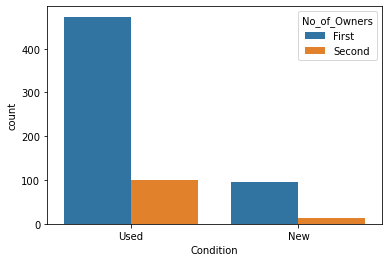

In [239]:
sns.countplot(New_MarutiS_df.Condition,hue=New_MarutiS_df.No_of_Owners)

In [240]:
New_MarutiS_df

,Model,No_of_Owners,Color,Type_of_Car,Transmission,Insurance_Type,Condition,Brand,Year,Fuel,KM_driven,Price
0,Swift,First,Other,Hatchback,Manual,NoInsurance,Used,Maruti Suzuki,2008.0,Diesel,110000,225000
1,Swift Dzire,First,Silver,Sedans,Manual,Comprehensive,Used,Maruti Suzuki,2010.0,Petrol,56951,265000
2,Swift,First,White,Sedans,Manual,Comprehensive,Used,Maruti Suzuki,2012.0,Diesel,55000,385000
3,Swift,First,Blue,Hatchback,Manual,Comprehensive,Used,Maruti Suzuki,2012.0,Petrol,18000,370000
4,Swift Dzire,First,Grey,Sedans,Manual,Comprehensive,Used,Maruti Suzuki,2013.0,CNG & Hybrids,97000,390000
...,...,...,...,...,...,...,...,...,...,...,...,...
733,Wagon R,Second,Silver,Hatchback,Manual,Comprehensive,Used,Maruti Suzuki,2005.0,Petrol,78000,175000
734,Wagon R,First,White,Hatchback,Manual,NaN,NaN,Maruti Suzuki,2011.0,Petrol,77100,295000
735,Wagon R 1.0,NaN,Silver,NaN,NaN,NoInsurance,NaN,Maruti Suzuki,2011.0,Petrol,98275,240000
736,Swift,First,Silver,Hatchback,Manual,ThirdParty,Used,Maruti Suzuki,2013.0,Petrol,40000,249666


In [243]:
New_MarutiS_df1=New_MarutiS_df.copy()

In [244]:

for i in range(len(New_MarutiS_df1)):
    a=New_MarutiS_df1.No_of_Owners[i]
    if(pd.isnull(a)):
        New_MarutiS_df1.No_of_Owners[i]='First'
        
       
    

F:\anaconda\envs\b\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [245]:
New_MarutiS_df1.No_of_Owners.unique()

array(['First', 'Second'], dtype=object)

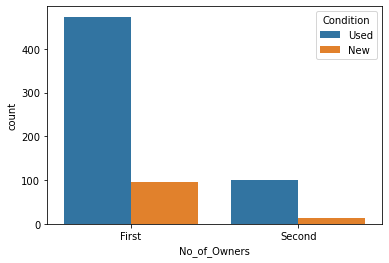

In [246]:

sns.countplot(New_MarutiS_df.No_of_Owners,hue=New_MarutiS_df.Condition)

In [247]:
for i in range(len(New_MarutiS_df1)):
    a=New_MarutiS_df1.Condition[i]
    if(pd.isnull(a)):
        New_MarutiS_df1.Condition[i]='Used'
        

F:\anaconda\envs\b\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


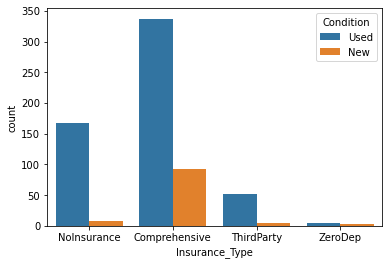

In [248]:

sns.countplot(New_MarutiS_df.Insurance_Type,hue=New_MarutiS_df.Condition)

In [249]:
for i in range(len(New_MarutiS_df1)):
    a=New_MarutiS_df1.Insurance_Type[i]
    if(pd.isnull(a)):
        New_MarutiS_df1.Insurance_Type[i]='Comprehensive'

F:\anaconda\envs\b\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


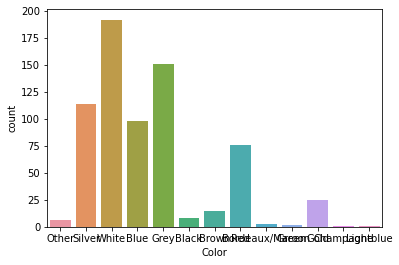

In [250]:
sns.countplot(New_MarutiS_df.Color)

In [251]:
for i in range(len(New_MarutiS_df1)):
    a=New_MarutiS_df1.Color[i]
    if(pd.isnull(a)):
        New_MarutiS_df1.Color[i]='White'
    if(a=='Other'):
        New_MarutiS_df1.Color[i]='Grey'

F:\anaconda\envs\b\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
F:\anaconda\envs\b\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


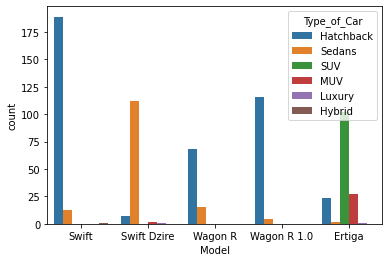

In [252]:
sns.countplot(New_MarutiS_df.Model,hue=New_MarutiS_df.Type_of_Car)

In [253]:
for i in range(len(New_MarutiS_df1)):
    a=New_MarutiS_df1.Type_of_Car[i]
    b=New_MarutiS_df1.Model[i]
    if(pd.isnull(a) and (b=='Swift' or b=='Wagon R' or b=='Wagon R 1.0')):
        New_MarutiS_df1.Type_of_Car[i]='Hatchback'
    elif(pd.isnull(a) and b=='Swift Dzire'):
        New_MarutiS_df1.Type_of_Car[i]='Sedans'
    elif(pd.isnull(a) and b=='Ertiga'):
        New_MarutiS_df1.Type_of_Car[i]='SUV'


F:\anaconda\envs\b\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
F:\anaconda\envs\b\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
F:\anaconda\envs\b\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


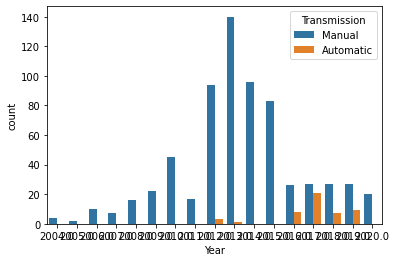

In [254]:
sns.countplot(New_MarutiS_df.Year,hue=New_MarutiS_df.Transmission)

In [255]:
for i in range(len(New_MarutiS_df1)):
    a=New_MarutiS_df1.Transmission[i]
    if(pd.isnull(a)):
        New_MarutiS_df1.Transmission[i]='Manual'


F:\anaconda\envs\b\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [256]:
New_MarutiS_df1.isnull().sum()

Model             0
No_of_Owners      0
Color             0
Type_of_Car       0
Transmission      0
Insurance_Type    0
Condition         0
Brand             0
Year              0
Fuel              0
KM_driven         0
Price             0
dtype: int64

## All nan value fill based on other coulns values

In [257]:
New_MarutiS_df1

,Model,No_of_Owners,Color,Type_of_Car,Transmission,Insurance_Type,Condition,Brand,Year,Fuel,KM_driven,Price
0,Swift,First,Grey,Hatchback,Manual,NoInsurance,Used,Maruti Suzuki,2008.0,Diesel,110000,225000
1,Swift Dzire,First,Silver,Sedans,Manual,Comprehensive,Used,Maruti Suzuki,2010.0,Petrol,56951,265000
2,Swift,First,White,Sedans,Manual,Comprehensive,Used,Maruti Suzuki,2012.0,Diesel,55000,385000
3,Swift,First,Blue,Hatchback,Manual,Comprehensive,Used,Maruti Suzuki,2012.0,Petrol,18000,370000
4,Swift Dzire,First,Grey,Sedans,Manual,Comprehensive,Used,Maruti Suzuki,2013.0,CNG & Hybrids,97000,390000
...,...,...,...,...,...,...,...,...,...,...,...,...
733,Wagon R,Second,Silver,Hatchback,Manual,Comprehensive,Used,Maruti Suzuki,2005.0,Petrol,78000,175000
734,Wagon R,First,White,Hatchback,Manual,Comprehensive,Used,Maruti Suzuki,2011.0,Petrol,77100,295000
735,Wagon R 1.0,First,Silver,Hatchback,Manual,NoInsurance,Used,Maruti Suzuki,2011.0,Petrol,98275,240000
736,Swift,First,Silver,Hatchback,Manual,ThirdParty,Used,Maruti Suzuki,2013.0,Petrol,40000,249666


In [265]:
Maruti_Suzuki=New_MarutiS_df1.copy()

In [266]:
Maruti_Suzuki

,Model,No_of_Owners,Color,Type_of_Car,Transmission,Insurance_Type,Condition,Brand,Year,Fuel,KM_driven,Price
0,Swift,First,Grey,Hatchback,Manual,NoInsurance,Used,Maruti Suzuki,2008.0,Diesel,110000,225000
1,Swift Dzire,First,Silver,Sedans,Manual,Comprehensive,Used,Maruti Suzuki,2010.0,Petrol,56951,265000
2,Swift,First,White,Sedans,Manual,Comprehensive,Used,Maruti Suzuki,2012.0,Diesel,55000,385000
3,Swift,First,Blue,Hatchback,Manual,Comprehensive,Used,Maruti Suzuki,2012.0,Petrol,18000,370000
4,Swift Dzire,First,Grey,Sedans,Manual,Comprehensive,Used,Maruti Suzuki,2013.0,CNG & Hybrids,97000,390000
...,...,...,...,...,...,...,...,...,...,...,...,...
733,Wagon R,Second,Silver,Hatchback,Manual,Comprehensive,Used,Maruti Suzuki,2005.0,Petrol,78000,175000
734,Wagon R,First,White,Hatchback,Manual,Comprehensive,Used,Maruti Suzuki,2011.0,Petrol,77100,295000
735,Wagon R 1.0,First,Silver,Hatchback,Manual,NoInsurance,Used,Maruti Suzuki,2011.0,Petrol,98275,240000
736,Swift,First,Silver,Hatchback,Manual,ThirdParty,Used,Maruti Suzuki,2013.0,Petrol,40000,249666


In [269]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
Maruti_Suzuki['Model']= le.fit_transform(Maruti_Suzuki['Model']) 
Maruti_Suzuki['No_of_Owners']= le.fit_transform(Maruti_Suzuki['No_of_Owners'])
Maruti_Suzuki['Color']= le.fit_transform(Maruti_Suzuki['Color']) 
Maruti_Suzuki['Type_of_Car']= le.fit_transform(Maruti_Suzuki['Type_of_Car'])
Maruti_Suzuki['Insurance_Type']= le.fit_transform(Maruti_Suzuki['Insurance_Type']) 
Maruti_Suzuki['Condition']= le.fit_transform(Maruti_Suzuki['Condition'])
Maruti_Suzuki['Brand']= le.fit_transform(Maruti_Suzuki['Brand']) 
Maruti_Suzuki['Fuel']= le.fit_transform(Maruti_Suzuki['Fuel'])
Maruti_Suzuki['Transmission']= le.fit_transform(Maruti_Suzuki['Transmission']) 
Maruti_Suzuki['Year']= le.fit_transform(Maruti_Suzuki['Year']) 

In [279]:
Maruti_Suzuki

,Model,No_of_Owners,Color,Type_of_Car,Transmission,Insurance_Type,Condition,Brand,Year,Fuel,KM_driven,Price
0,1,0,7,0,1,1,1,0,4,1,110000,225000
1,2,0,10,5,1,0,1,0,6,3,56951,265000
2,1,0,11,5,1,0,1,0,8,1,55000,385000
3,1,0,1,0,1,0,1,0,8,3,18000,370000
4,2,0,7,5,1,0,1,0,9,0,97000,390000
...,...,...,...,...,...,...,...,...,...,...,...,...
733,3,1,10,0,1,0,1,0,1,3,78000,175000
734,3,0,11,0,1,0,1,0,7,3,77100,295000
735,4,0,10,0,1,1,1,0,7,3,98275,240000
736,1,0,10,0,1,2,1,0,9,3,40000,249666


In [271]:
Maruti_Suzuki.columns

Index(['Model', 'No_of_Owners', 'Color', 'Type_of_Car', 'Transmission',
       'Insurance_Type', 'Condition', 'Brand', 'Year', 'Fuel', 'KM_driven',
       'Price'],
      dtype='object')

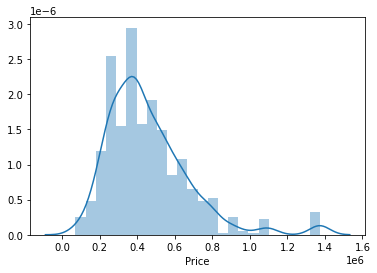

In [273]:
import seaborn as sns
sns.distplot(Maruti_Suzuki['Price'])

In [275]:
## Response Vriable is normal distribut

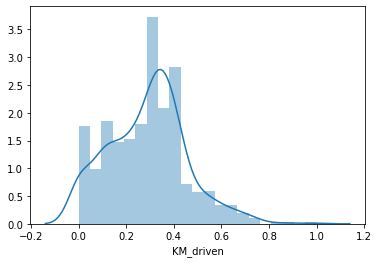

In [422]:
sns.distplot(Maruti_Suzuki['KM_driven'])

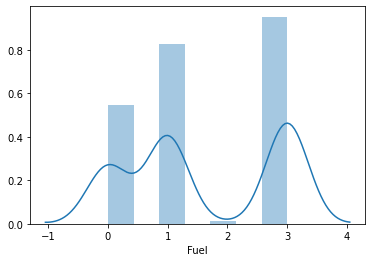

In [423]:
sns.distplot(Maruti_Suzuki['Fuel'])

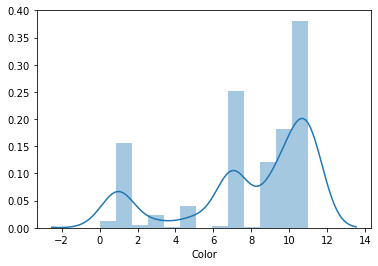

In [424]:
sns.distplot(Maruti_Suzuki['Color'])

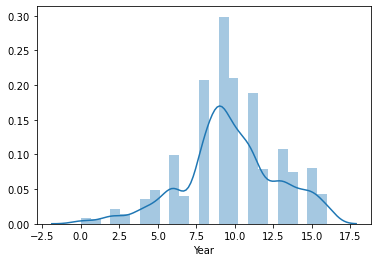

In [425]:
sns.distplot(Maruti_Suzuki['Year'])

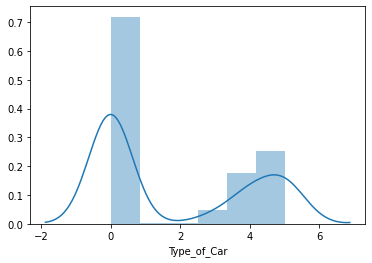

In [426]:
sns.distplot(Maruti_Suzuki['Type_of_Car'])

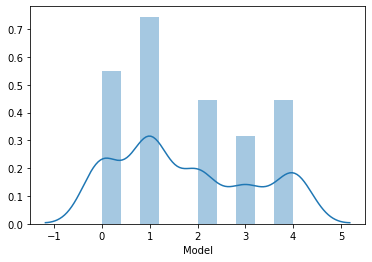

In [428]:
sns.distplot(Maruti_Suzuki['Model'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002026DD9AD30>,
      dtype=object)

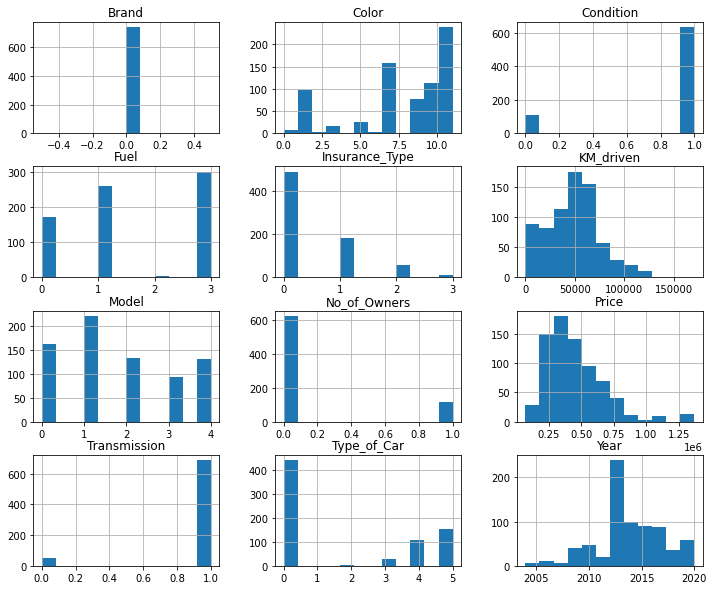

In [277]:
Maruti_Suzuki.hist(figsize=(12,10),bins=12)

In [280]:
## Corr

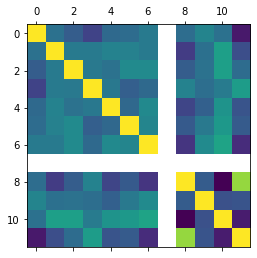

,Model,No_of_Owners,Color,Type_of_Car,Transmission,Insurance_Type,Condition,Brand,Year,Fuel,KM_driven,Price
Model,1.000000,-0.012180,-0.139959,-0.293566,-0.068454,-0.047894,0.047650,NaN,-0.041151,0.114184,-0.011872,-0.506188
No_of_Owners,-0.012180,1.000000,0.048629,0.041990,0.099570,0.091671,0.040476,NaN,-0.331060,-0.020060,0.295341,-0.229611
Color,-0.139959,0.048629,1.000000,0.037342,-0.011484,0.155171,0.154237,NaN,-0.143045,-0.007527,0.292880,-0.045535
Type_of_Car,-0.293566,0.041990,0.037342,1.000000,0.028559,-0.127985,-0.062838,NaN,0.101312,-0.031260,0.056215,0.273279
Transmission,-0.068454,0.099570,-0.011484,0.028559,1.000000,-0.072775,0.151352,NaN,-0.280631,-0.119841,0.216020,-0.197338
Insurance_Type,-0.047894,0.091671,0.155171,-0.127985,-0.072775,1.000000,0.115090,NaN,-0.160433,0.034286,0.245312,-0.152212
Condition,0.047650,0.040476,0.154237,-0.062838,0.151352,0.115090,1.000000,NaN,-0.367105,0.153754,0.323233,-0.414733
Brand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,-0.041151,-0.331060,-0.143045,0.101312,-0.280631,-0.160433,-0.367105,NaN,1.000000,-0.146724,-0.618501,0.741150
Fuel,0.114184,-0.020060,-0.007527,-0.031260,-0.119841,0.034286,0.153754,NaN,-0.146724,1.000000,-0.214128,-0.200620


In [286]:
import matplotlib.pyplot as plt
plt.matshow(Maruti_Suzuki.corr())
plt.show()
Maruti_Suzuki.corr()

In [284]:
## White show because one brand is avilable in this Datasets so We drop it or not there no effect

<Figure size 864x864 with 0 Axes>

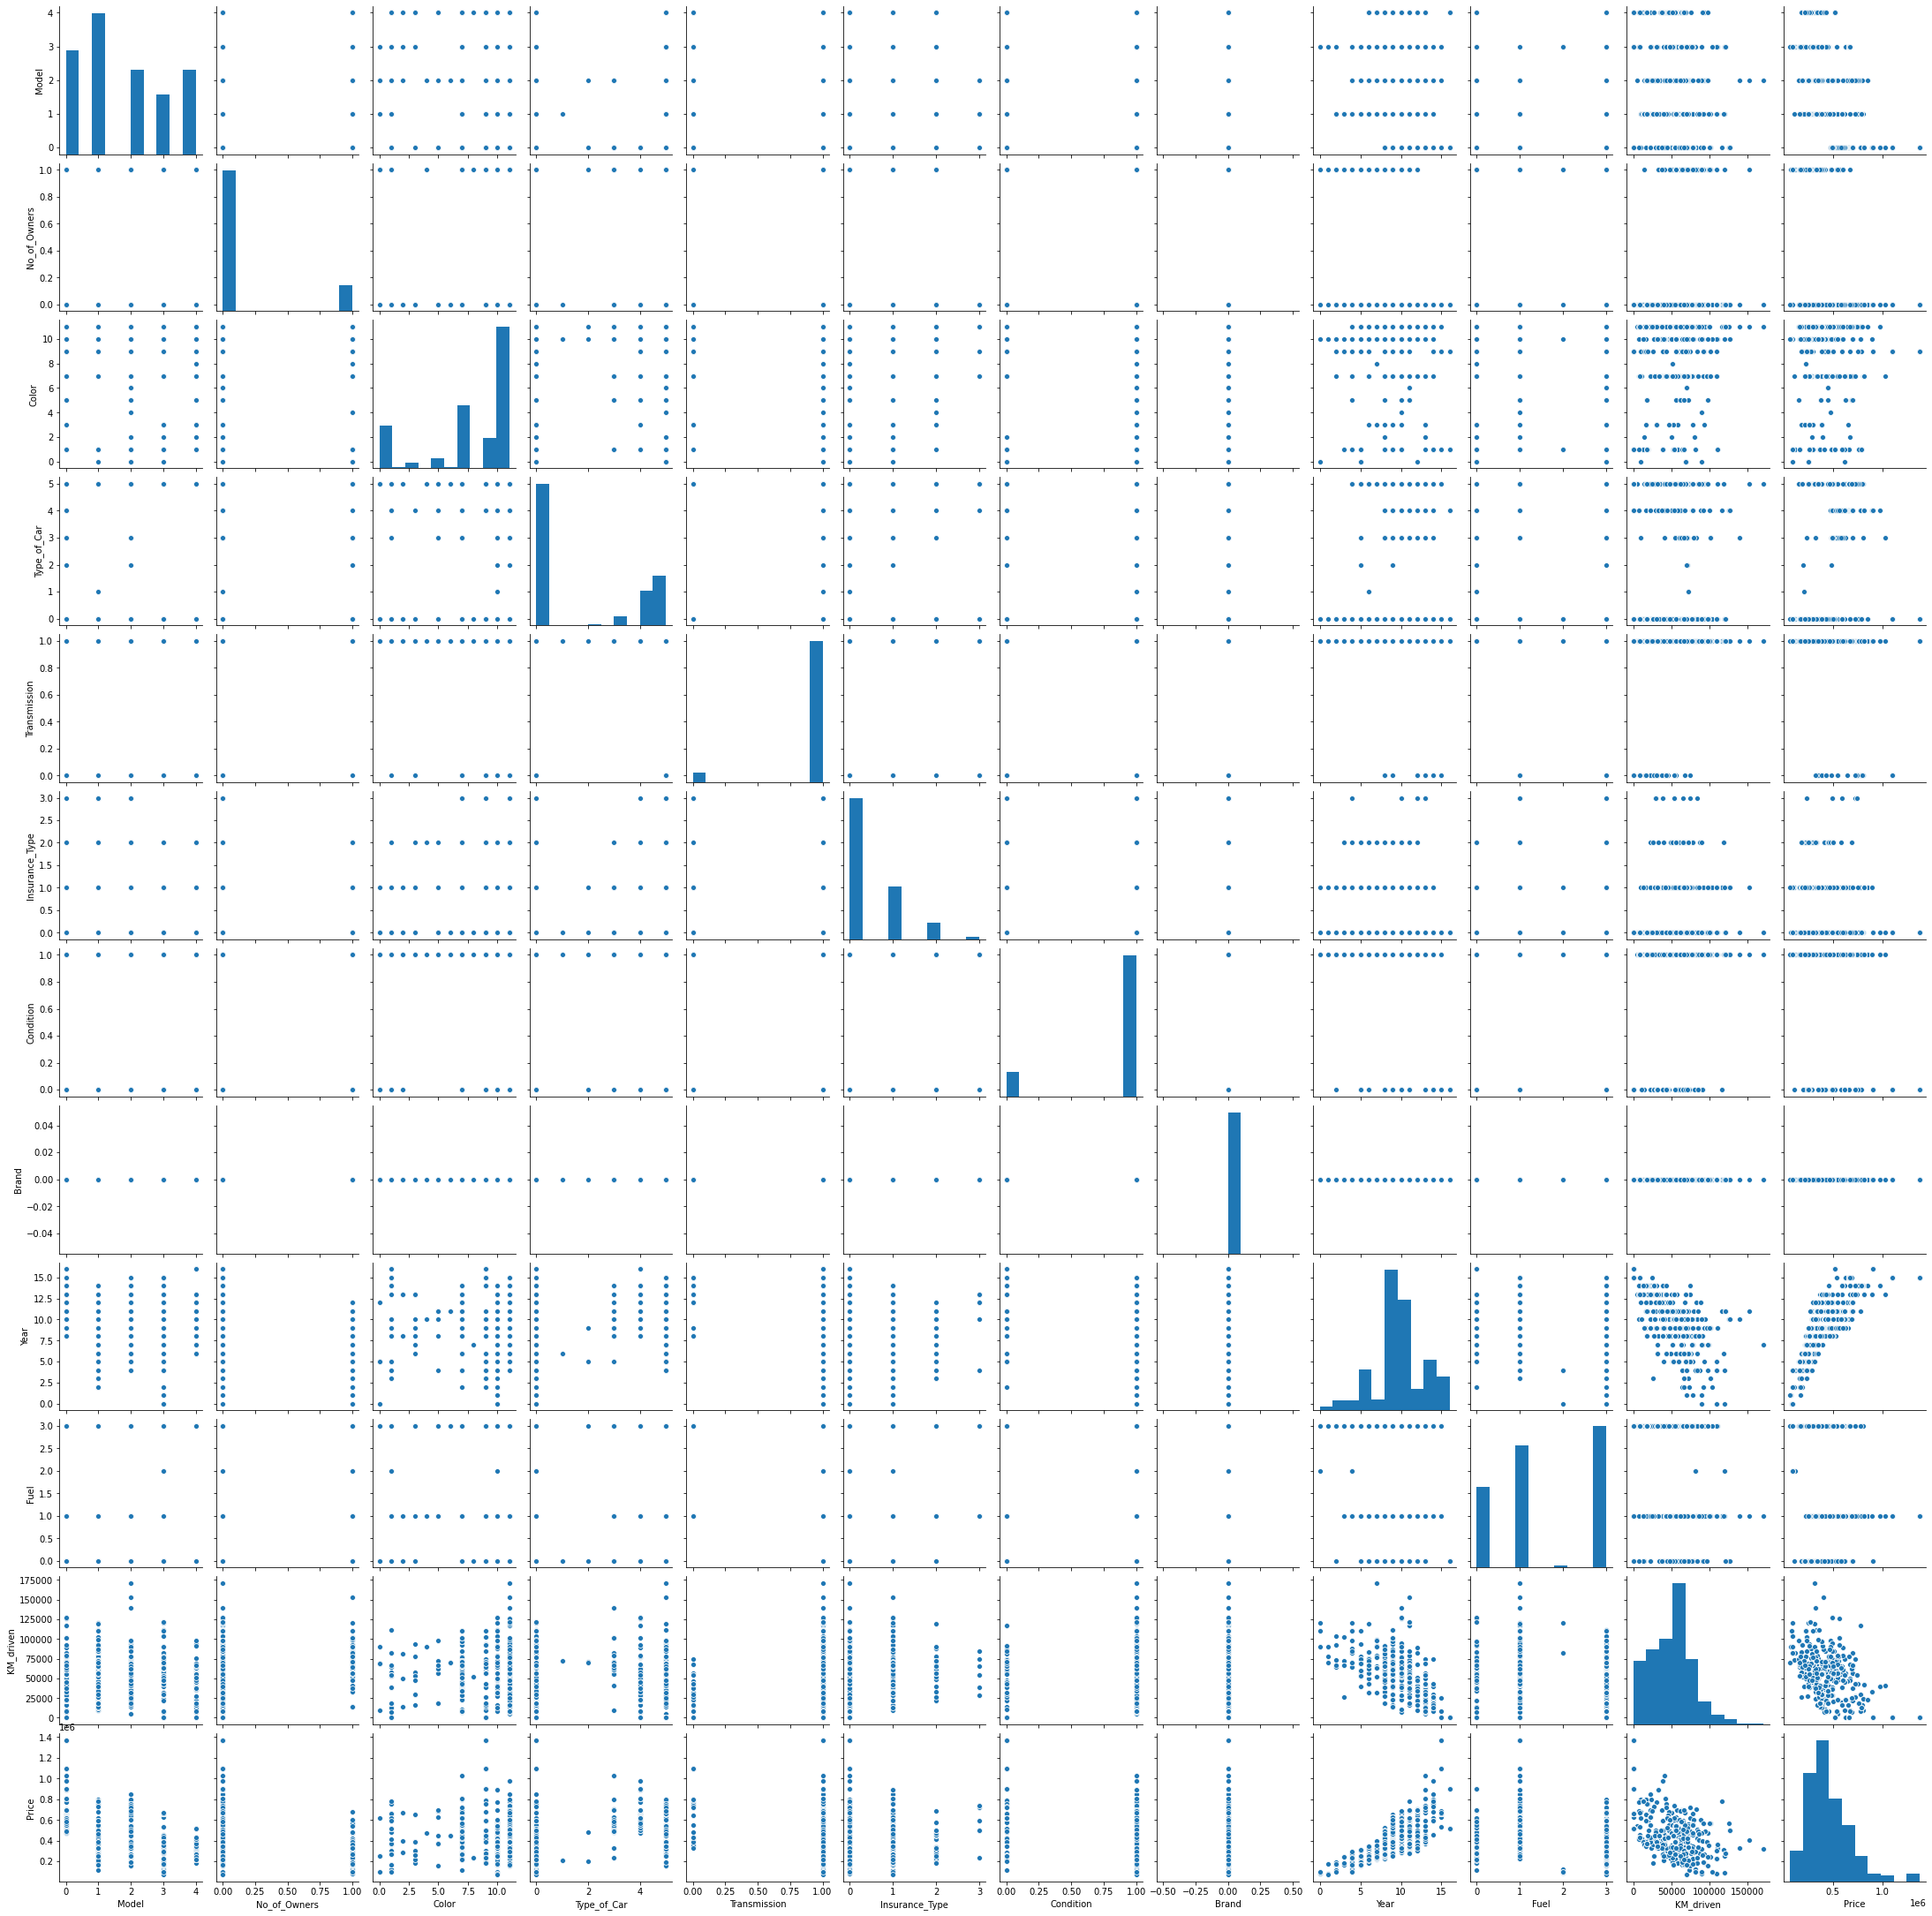

In [287]:
plt.figure(figsize=(12, 12))
sns.pairplot(Maruti_Suzuki)
plt.show()

In [290]:
## Scale The Dataset
num_vars=['KM_driven','Price']

In [293]:
# We will use min-max scaling
scaler = MinMaxScaler()

In [294]:
Maruti_Suzuki[num_vars] = scaler.fit_transform(Maruti_Suzuki[num_vars])

In [350]:
Maruti_Suzuki

,Model,No_of_Owners,Color,Type_of_Car,Transmission,Insurance_Type,Condition,Brand,Year,Fuel,KM_driven,Price
0,1,0,7,0,1,1,1,0,4,1,0.643273,0.119008
1,2,0,10,5,1,0,1,0,6,3,0.333043,0.149720
2,1,0,11,5,1,0,1,0,8,1,0.321633,0.241856
3,1,0,1,0,1,0,1,0,8,3,0.105258,0.230339
4,2,0,7,5,1,0,1,0,9,0,0.567249,0.245695
...,...,...,...,...,...,...,...,...,...,...,...,...
733,3,1,10,0,1,0,1,0,1,3,0.456137,0.080619
734,3,0,11,0,1,0,1,0,7,3,0.450874,0.172754
735,4,0,10,0,1,1,1,0,7,3,0.574705,0.130525
736,1,0,10,0,1,2,1,0,9,3,0.233914,0.137947


In [296]:
Maruti_Suzuki.describe()

,Model,No_of_Owners,Color,Type_of_Car,Transmission,Insurance_Type,Condition,Brand,Year,Fuel,KM_driven,Price
count,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.0,738.000000,738.000000,738.000000,738.000000
mean,1.743902,0.155827,7.911924,1.766938,0.933604,0.443089,0.853659,0.0,9.689702,1.588076,0.289312,0.297668
std,1.396156,0.362937,3.469439,2.208259,0.249141,0.695117,0.353688,0.0,3.109041,1.235376,0.165467,0.172185
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,7.000000,0.000000,1.000000,0.000000,1.000000,0.0,8.000000,1.000000,0.169586,0.172754
50%,1.000000,0.000000,9.000000,0.000000,1.000000,0.000000,1.000000,0.0,9.500000,1.000000,0.315785,0.264890
75%,3.000000,0.000000,11.000000,4.000000,1.000000,1.000000,1.000000,0.0,11.000000,3.000000,0.391809,0.368542
max,4.000000,1.000000,11.000000,5.000000,1.000000,3.000000,1.000000,0.0,16.000000,3.000000,1.000000,1.000000


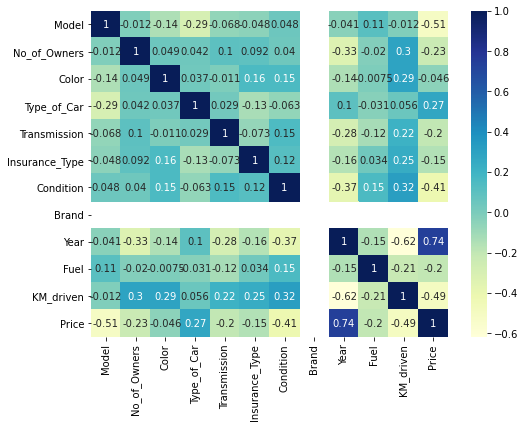

In [300]:
plt.figure(figsize = (8, 6))
sns.heatmap(Maruti_Suzuki.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Model 1

In [301]:
## RFE
## Recursive feature elimination

In [322]:
Model1_Df=Maruti_Suzuki.copy()

In [323]:
y = Model1_Df.pop('Price')
X = Model1_Df

In [352]:
X

,const,Model,Type_of_Car,Transmission,Insurance_Type,Condition,Year,Fuel,KM_driven
0,1.0,1,0,1,1,1,4,1,0.643273
1,1.0,2,5,1,0,1,6,3,0.333043
2,1.0,1,5,1,0,1,8,1,0.321633
3,1.0,1,0,1,0,1,8,3,0.105258
4,1.0,2,5,1,0,1,9,0,0.567249
...,...,...,...,...,...,...,...,...,...
733,1.0,3,0,1,0,1,1,3,0.456137
734,1.0,3,0,1,0,1,7,3,0.450874
735,1.0,4,0,1,1,1,7,3,0.574705
736,1.0,1,0,1,2,1,9,3,0.233914


In [325]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [326]:
# Running RFE with the output number of the variable equal to 6 to 8 columns
lm = LinearRegression()
lm.fit(X, y)

rfe = RFE(lm, 8)                    
rfe = rfe.fit(X, y)

In [327]:
list(zip(X.columns,rfe.support_,rfe.ranking_))

[('Model', True, 1),
 ('No_of_Owners', False, 2),
 ('Color', False, 3),
 ('Type_of_Car', True, 1),
 ('Transmission', True, 1),
 ('Insurance_Type', True, 1),
 ('Condition', True, 1),
 ('Brand', False, 4),
 ('Year', True, 1),
 ('Fuel', True, 1),
 ('KM_driven', True, 1)]

In [328]:
col = X.columns[rfe.support_]
col

Index(['Model', 'Type_of_Car', 'Transmission', 'Insurance_Type', 'Condition',
       'Year', 'Fuel', 'KM_driven'],
      dtype='object')

In [329]:
# Creating X_test dataframe with RFE selected variables
X = X[col]

In [330]:
# Adding a constant variable 
import statsmodels.api as sm  
X = sm.add_constant(X)


In [331]:
lm = sm.OLS(y,X).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     381.7
Date:                Tue, 21 Apr 2020   Prob (F-statistic):          1.01e-254
Time:                        09:48:16   Log-Likelihood:                 859.14
No. Observations:                 738   AIC:                            -1700.
Df Residuals:                     729   BIC:                            -1659.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1981      0.025      7.

In [332]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_ = X
vif['Features'] = X_.columns
vif['VIF'] = [variance_inflation_factor(X_.values, i) for i in range(X_.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,83.06
8,KM_driven,2.16
6,Year,2.08
7,Fuel,1.31
5,Condition,1.23
2,Type_of_Car,1.17
3,Transmission,1.15
1,Model,1.13
4,Insurance_Type,1.13


In [333]:
# Dropping curbweight as p-value is high.
X_train_new1 = X.drop(["Insurance_Type"], axis = 1)


# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new1)

lm = sm.OLS(y,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     434.3
Date:                Tue, 21 Apr 2020   Prob (F-statistic):          2.54e-255
Time:                        09:51:22   Log-Likelihood:                 857.42
No. Observations:                 738   AIC:                            -1699.
Df Residuals:                     730   BIC:                            -1662.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1951      0.025      7.656   

In [334]:
# This leaves mileage Transmission.

In [336]:
# Dropping hardtop as p value is high.
X_train_new2 = X_train_new1.drop(["Transmission"], axis = 1)


# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new2)

lm = sm.OLS(y,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     504.2
Date:                Tue, 21 Apr 2020   Prob (F-statistic):          6.71e-256
Time:                        09:52:51   Log-Likelihood:                 855.57
No. Observations:                 738   AIC:                            -1697.
Df Residuals:                     731   BIC:                            -1665.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1674      0.021      7.968      

## Now over Model is Better becuase F statistic Values are increase

In [340]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_train_new2,y,test_size=0.3, random_state=10)

In [357]:
residual.shape

(516,)

In [433]:
# Importing the libraries
def LinearRegression():
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.metrics import mean_squared_error as mse
    
    #Model fitting on training set
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    
    
    #prediction for train test and test test
    y_pred_train = lr.predict(x_train)
    y_pred_test = lr.predict(x_test)
    
    #Training and Testing MSE and RMSE
    train_mse = np.mean((y_train - lr.predict(x_train)) ** 2)
    test_mse = np.mean((y_test - lr.predict(x_test))** 2)
    print('   Linear   Regression    ')
    print("Train MSE is",train_mse)
    print("Test MSE is",test_mse)
    print("Train RMSE is:",np.sqrt(train_mse))
    print("Test RMSE is",np.sqrt(test_mse))
    
    
    #r2 Score value
    r2 = r2_score(y_test,y_pred_test)
    print("r2 score is",r2)
    print('   Linear   Regression    ')
    #Plotting Residual Plot
    residual=y_train-y_pred_train
    residual=residual.values.reshape(len(residual),1)
    plt.scatter(y_train,residual,c = "red")
    plt.xlabel("residual")
    plt.ylabel("y_test")
    plt.axhline(y = 0)
    #Checming Normality Condition
    import scipy as sp
    fig, ax = plt.subplots(figsize=(6,3))
    _, (__, ___, r) = sp.stats.probplot(residual.reshape((516,)), plot=ax, fit=True)

In [395]:
# Ridge Regression
def Ridge_Regression():
    from sklearn.linear_model import Ridge
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.metrics import mean_squared_error as mse
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    #Model fitting on training set
    ridge = Ridge(alpha=0.05)
    ridge.fit(x_train,y_train)
    
    
    #prediction for train test and test test
    y_pred_train = ridge.predict(x_train)
    y_pred_test = ridge.predict(x_test)
    
    #Training and Testing MSE and RMSE
    train_mse = np.mean((y_train - ridge.predict(x_train)) ** 2)
    test_mse = np.mean((y_test - ridge.predict(x_test))** 2)
    print('       Ridge_Regression         ')
    print("Train MSE is",train_mse)
    print("Test MSE is",test_mse)
    print("Train RMSE is:",np.sqrt(train_mse))
    print("Test RMSE is",np.sqrt(test_mse))
    
    
    #r2 Score value
    r2 = r2_score(y_test,y_pred_test)
    print("r2 score is",r2)
    print('       Ridge_Regression         ')
    #Plotting Residual Plot
    residual=y_train-y_pred_train
    residual=residual.values.reshape(len(residual),1)
    plt.scatter(y_train,residual,c = "red")
    plt.xlabel("residual")
    plt.ylabel("y_test")
    plt.axhline(y = 0)
    #Checming Normality Condition
    import scipy as sp
    fig, ax = plt.subplots(figsize=(6,3))
    _, (__, ___, r) = sp.stats.probplot(residual.reshape((516,)), plot=ax, fit=True)
    

In [396]:
# Lasso Regression
def Lasso_Regression():
    from sklearn.linear_model import Lasso
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.metrics import mean_squared_error as mse
    
    #Model fitting on training set
    lasso = Lasso(alpha=0.05)
    lasso.fit(x_train,y_train)
    
    
    #prediction for train test and test test
    y_pred_train = lasso.predict(x_train)
    y_pred_test = lasso.predict(x_test)
    
    #Training and Testing MSE and RMSE
    train_mse = np.mean((y_train - lasso.predict(x_train)) ** 2)
    test_mse = np.mean((y_test - lasso.predict(x_test))** 2)
    print('       Lasso_Regression         ')
    print("Train MSE is",train_mse)
    print("Test MSE is",test_mse)
    print("Train RMSE is:",np.sqrt(train_mse))
    print("Test RMSE is",np.sqrt(test_mse))
    
    
    #r2 Score value
    r2 = r2_score(y_test,y_pred_test)
    print("r2 score is",r2)
    #Plotting Residual Plot
    print('       Lasso_Regression         ')
    residual=y_train-y_pred_train
    residual=residual.values.reshape(len(residual),1)
    plt.scatter(y_train,residual,c = "red")
    plt.xlabel("residual")
    plt.ylabel("y_test")
    plt.axhline(y = 0)
    #Checming Normality Condition
    import scipy as sp
    fig, ax = plt.subplots(figsize=(6,3))
    _, (__, ___, r) = sp.stats.probplot(residual.reshape((516,)), plot=ax, fit=True)

## Using Support Vector Regression

In [397]:
def SVR():
    from sklearn.svm import SVR
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.metrics import mean_squared_error as mse
    
    #Model fitting on training set
    sv = SVR(kernel = "linear")
    sv.fit(x_train,y_train)
    
    #prediction for train test and test test
    y_pred_train = sv.predict(x_train)
    y_pred_test = sv.predict(x_test)
    
    #Training and Testing MSE and RMSE
    train_mse = np.mean((y_train - sv.predict(x_train)) ** 2)
    test_mse = np.mean((y_test - sv.predict(x_test))** 2)
    print('              Support Vector Regression     ')
    print("Train MSE is :",train_mse)
    print("Test MSE is  :",test_mse)
    print("Train RMSE is:",np.sqrt(train_mse))
    print("Test RMSE is :",np.sqrt(test_mse))
    
    
    #r2 Score value
    r2 = r2_score(y_test,y_pred_test)
    print("r2 score is",r2)
    print('              Support Vector Regression     ')
    #Plotting Residual Plot
    residual=y_train-y_pred_train
    residual=residual.values.reshape(len(residual),1)
    plt.scatter(y_train,residual,c = "red")
    plt.xlabel("residual")
    plt.ylabel("y_test")
    plt.axhline(y = 0)
    #Checming Normality Condition
    import scipy as sp
    fig, ax = plt.subplots(figsize=(6,3))
    _, (__, ___, r) = sp.stats.probplot(residual.reshape((516,)), plot=ax, fit=True)

# Using DecisionTree

In [398]:
def Decision_Tree():
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import mean_squared_error, r2_score
    
    
    #Model fitting on training set
    reg = DecisionTreeRegressor(criterion="mse",max_depth=4,random_state=10)
    reg.fit(x_train,y_train)
    
    #prediction for train test and test test
    y_pred_train = reg.predict(x_train)
    y_pred_test = reg.predict(x_test)
    
    #Training and Testing MSE and RMSE
    train_mse = np.mean((y_train - reg.predict(x_train)) ** 2)
    test_mse = np.mean((y_test - reg.predict(x_test))** 2)
    print('               Decision_Tree        ')
    print("Train MSE is",train_mse)
    print("Test MSE is",test_mse)
    print("Train RMSE is:",np.sqrt(train_mse))
    print("Test RMSE is",np.sqrt(test_mse))
    
    
    #r2 Score value
    r2 = r2_score(y_test,y_pred_test)
    print("r2 score is",r2)
    
    print('               Decision_Tree        ')
    #Plotting Residual Plot
    residual=y_train-y_pred_train
    residual=residual.values.reshape(len(residual),1)
    plt.scatter(y_train,residual,c = "red")
    plt.xlabel("residual")
    plt.ylabel("y_test")
    plt.axhline(y = 0)
    #Checming Normality Condition
    import scipy as sp
    fig, ax = plt.subplots(figsize=(6,3))
    _, (__, ___, r) = sp.stats.probplot(residual.reshape((516,)), plot=ax, fit=True)

# Using KNearest Neighbor

In [399]:
def KNN():
    from sklearn.neighbors import KNeighborsRegressor
    
    #Model fitting on training set
    neigh = KNeighborsRegressor(n_neighbors=3)
    neigh.fit(x_train,y_train)
    
    #prediction for train test and test test
    y_pred_train = neigh.predict(x_train)
    y_pred_test = neigh.predict(x_test)
    
    #Training and Testing MSE and RMSE
    train_mse = np.mean((y_train - neigh.predict(x_train)) ** 2)
    test_mse = np.mean((y_test - neigh.predict(x_test))** 2)
    print('       KNearest Neighbor         ')
    print("Train MSE is",train_mse)
    print("Test MSE is",test_mse)
    print("Train RMSE is:",np.sqrt(train_mse))
    print("Test RMSE is",np.sqrt(test_mse))
    
    
    #r2 Score value
    r2 = r2_score(y_test,y_pred_test)
    print("r2 score is",r2)
    print('       KNearest Neighbor         ')
    
    #Plotting Residual Plot
    residual=y_train-y_pred_train
    residual=residual.values.reshape(len(residual),1)
    plt.scatter(y_train,residual,c = "red")
    plt.xlabel("residual")
    plt.ylabel("y_test")
    plt.axhline(y = 0)
    #Checming Normality Condition
    import scipy as sp
    fig, ax = plt.subplots(figsize=(6,3))
    _, (__, ___, r) = sp.stats.probplot(residual.reshape((516,)), plot=ax, fit=True)
    

# Using GradientBoostingRegressor 

In [400]:
def GradientBoostingRegressor():
    from sklearn.ensemble import GradientBoostingRegressor as xgb 
    
    #Model fitting on training set
    clf_xgb = xgb(learning_rate=0.01, n_estimators=500, max_depth=3, subsample= 0.5)
    clf_xgb.fit(x_train, y_train)
    
    
    #prediction for train test and test test
    y_pred_train = clf_xgb.predict(x_train)
    y_pred_test = clf_xgb.predict(x_test)
    
    #Training and Testing MSE and RMSE
    train_mse = np.mean((y_train - clf_xgb.predict(x_train)) ** 2)
    test_mse = np.mean((y_test - clf_xgb.predict(x_test))** 2)
    print('     GradientBoostingRegressor       ')
    print("Train MSE is",train_mse)
    print("Test MSE is",test_mse)
    print("Train RMSE is:",np.sqrt(train_mse))
    print("Test RMSE is",np.sqrt(test_mse))
    
    
    #r2 Score value
    r2 = r2_score(y_test,y_pred_test)
    print("r2 score is",r2)
    print('     GradientBoostingRegressor       ')
    #Plotting Residual Plot
    residual=y_train-y_pred_train
    residual=residual.values.reshape(len(residual),1)
    plt.scatter(y_train,residual,c = "red")
    plt.xlabel("residual")
    plt.ylabel("y_test")
    plt.axhline(y = 0)
    #Checming Normality Condition
    import scipy as sp
    fig, ax = plt.subplots(figsize=(6,3))
    _, (__, ___, r) = sp.stats.probplot(residual.reshape((516,)), plot=ax, fit=True)
    

# Using RandomForest Regressor

In [401]:
def RandomForest_Regressor():
    from sklearn.ensemble import RandomForestRegressor
    
    #Model fitting on training set
    rm = RandomForestRegressor(random_state=10)
    rm.fit(x_train,y_train)
    
    #prediction for train test and test test
    y_pred_train = rm.predict(x_train)
    y_pred_test = rm.predict(x_test)
    
    #Training and Testing MSE and RMSE
    train_mse = np.mean((y_train - rm.predict(x_train)) ** 2)
    test_mse = np.mean((y_test - rm.predict(x_test))** 2)
    print('       RandomForest Regressor          ')
    print("Train MSE is",train_mse)
    print("Test MSE is",test_mse)
    print("Train RMSE is:",np.sqrt(train_mse))
    print("Test RMSE is",np.sqrt(test_mse))
    
    
    #r2 Score value
    r2 = r2_score(y_test,y_pred_test)
    print("r2 score is",r2)
    
    print('       RandomForest Regressor          ')

    #Plotting Residual Plot
    residual=y_train-y_pred_train
    residual=residual.values.reshape(len(residual),1)
    plt.scatter(y_train,residual,c = "red")
    plt.xlabel("residual")
    plt.ylabel("y_test")
    plt.axhline(y = 0)
    #Checming Normality Condition
    import scipy as sp
    fig, ax = plt.subplots(figsize=(6,3))
    _, (__, ___, r) = sp.stats.probplot(residual.reshape((516,)), plot=ax, fit=True)

   Linear   Regression    
Train MSE is 0.00596568068314689
Test MSE is 0.005411058157453982
Train RMSE is: 0.07723781899527517
Test RMSE is 0.0735598950342779
r2 score is 0.8002072860979079
   Linear   Regression    


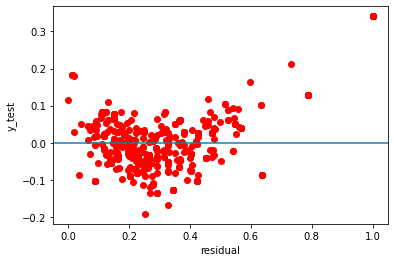

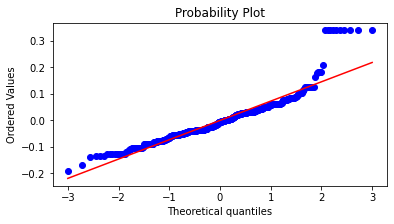

In [434]:
LinearRegression()

       Ridge_Regression         
Train MSE is 0.005965686464758437
Test MSE is 0.005412555817891605
Train RMSE is: 0.07723785642260171
Test RMSE is 0.0735700742006667
r2 score is 0.8001519879224626
       Ridge_Regression         


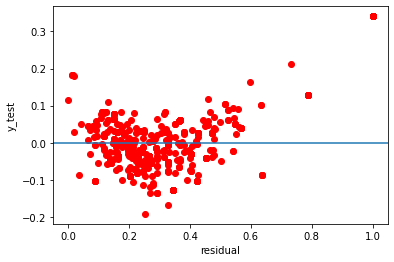

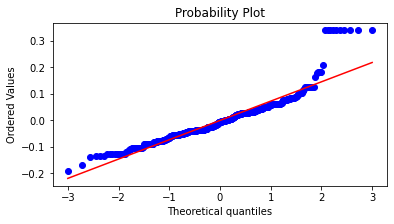

In [403]:
Ridge_Regression()


       Lasso_Regression         
Train MSE is 0.008247496178743019
Test MSE is 0.00697654886061905
Train RMSE is: 0.09081572649460565
Test RMSE is 0.08352573771370744
r2 score is 0.742404611080826
       Lasso_Regression         


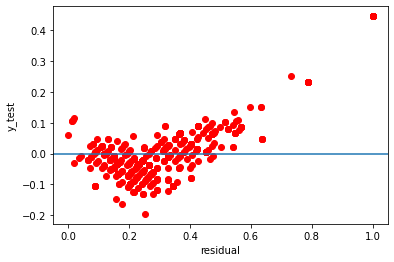

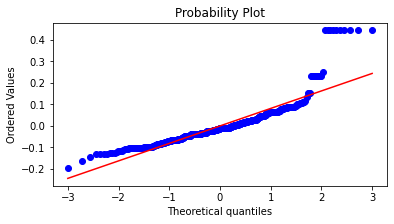

In [404]:
Lasso_Regression()

              Support Vector Regression     
Train MSE is : 0.0062013065643427324
Test MSE is  : 0.0058613622836297214
Train RMSE is: 0.07874837499493391
Test RMSE is : 0.07655953424381395
r2 score is 0.7835806890752856
              Support Vector Regression     


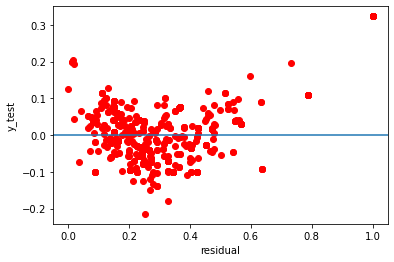

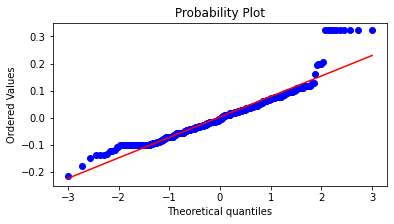

In [405]:
SVR()

               Decision_Tree        
Train MSE is 0.002822948090765467
Test MSE is 0.0030630343418223157
Train RMSE is: 0.0531314228189446
Test RMSE is 0.05534468666296988
r2 score is 0.886903462110277
               Decision_Tree        


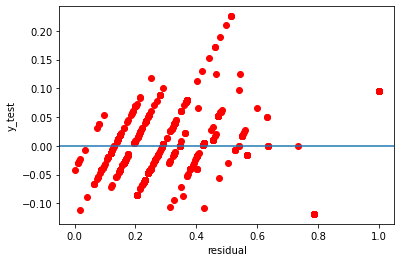

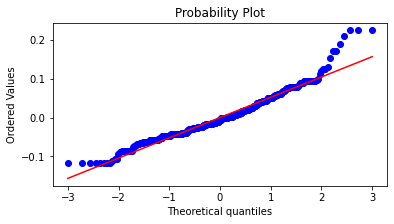

In [406]:
Decision_Tree()


       RandomForest Regressor          
Train MSE is 0.000492412076664184
Test MSE is 0.0008913230966497077
Train RMSE is: 0.022190359994019564
Test RMSE is 0.02985503469516838
r2 score is 0.9670896421251823
       RandomForest Regressor          


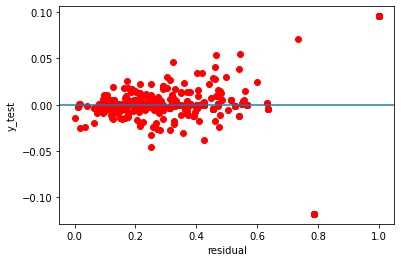

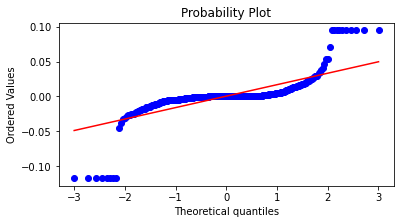

In [407]:
RandomForest_Regressor()


       KNearest Neighbor         
Train MSE is 0.000759452088761139
Test MSE is 0.0010520565196397704
Train RMSE is: 0.027558158297700867
Test RMSE is 0.03243542075632395
r2 score is 0.9611548756045676
       KNearest Neighbor         


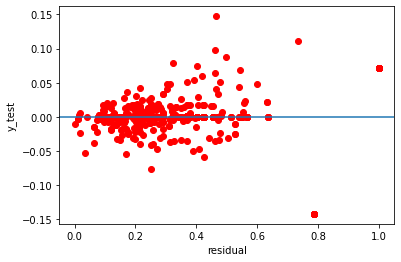

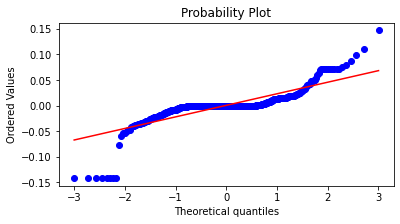

In [408]:
KNN()


     GradientBoostingRegressor       
Train MSE is 0.0009438493218838599
Test MSE is 0.0009901738127492201
Train RMSE is: 0.03072213081613741
Test RMSE is 0.03146702738978088
r2 score is 0.9634397732333685
     GradientBoostingRegressor       


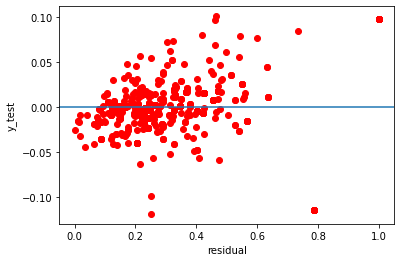

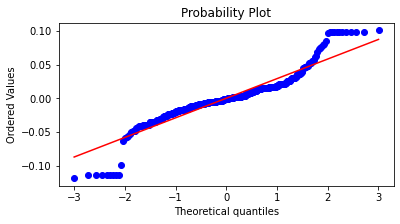

In [409]:
GradientBoostingRegressor()

## Conclusions
## I've tried to play with as much stuff as I could with this dataset in order to understand the very basic topics about:

## data interpretation and selection
## feature selection and labeling
## data visualization
## RandomForest_Regressor,KNeighborsRegressor,GradientBoostingRegressor giving Best 
## result of that conclusions